# Assignment 2

## Part 1

In this part a prediction error method will be used to estimate the parameters of a the data generated in part 1 in exercise 1. 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.optimize import minimize
data = pd.read_csv('/Users/loveredin/Documents/GitHub/advanced_time_series_analysis/assignment_2/data.csv', index_col = 0)
print(data.head())
X_t = np.array(data['Value'])
print(X_t)

      Value
0  0.000000
1  2.496714
2  2.361079
3  3.119904
4  4.147011
[ 0.          2.49671415  2.36107853 ... -5.18094676 -5.2957901
 -4.15212948]


In [30]:
def kernel(x, kernel_function = 'gaussian'):

    # Define different cases of kernel functions
    if kernel_function == 'gaussian':
        return np.exp(-0.5 * x ** 2) / np.sqrt(2 * np.pi)
    elif kernel_function == 'tricube':
        in_interval = np.abs(x) <= 1
        weights = np.zeros_like(x, dtype = float)
        weights[in_interval] = (1 - np.abs(x[in_interval]) ** 3) ** 3
        return weights
    else:
        return 1 / 2 * ((x >= -1) & (x <= 1)).astype(float)


In [ ]:
# Algo:
# Define the loss function
# Taylor expansion of loss function, done analytically
# Evaluate the taylor expansion of order 2, in the point theta_0
# Calculate gradient and hessian, evaluated at theta_0 and theta_est
# Use the scipy function minimization, when defined the loss function, to estimate the new parameters
# Estimate new parameters based on old, equation

# Only make small adjustments, 

# The data we are working with and am trying to estimate the parameters for is a setar model, with four parameters, theta_00, theta_01, theta_10, theta, 
# Want to compute the value for all N time values of the time series


def conditional_expectation(X_t_lagged, theta, threshold = 0):
    return np.where(X_t_lagged < threshold, theta[0] + theta[1] * X_t_lagged, 2 + 0.2 * X_t_lagged[-1])
    
def loss_function(X_t, theta, conditional_expectation):
    # This function defines the lag for which, time series to use, in this case it is going to be the lagged 1 time series
    
    # Optimization is carried out for all N, the length of the entire time series
    # If the optimizartion were to be carried out for a sub-sequent of the time series, the partial time series X_t of length N, would have been investigated
    # Here N = len(X_t) - 1

    return sum((X_t[1 : ] - conditional_expectation(X_t[ : -1], theta)) ** 2)   

# Only estimate two parameters
theta_0 = np.zeros(2)

theta_hat = minimize(lambda theta: loss_function(X_t, theta, conditional_expectation), theta_0)

print(theta_hat)

print(f'The parameter estimation is {theta_hat.x}')

# optimized theta: [-2.06836669  0.48354977]
# Actual theta [-2, 0.5], fairly good estimation, only estimated two of the parameters, with the other ones fixed to make 2 feasible

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 11766.435106909581
        x: [-2.068e+00  4.835e-01]
      nit: 5
      jac: [ 1.709e-03 -4.150e-03]
 hess_inv: [[ 6.985e-04  1.645e-04]
            [ 1.645e-04  4.180e-05]]
     nfev: 123
     njev: 38
The parameter estimation is [-2.06836669  0.48354977]


## Part 2

Plotting contour curves for different values of N, for the loss

TypeError: Input z must be 2D, not 3D

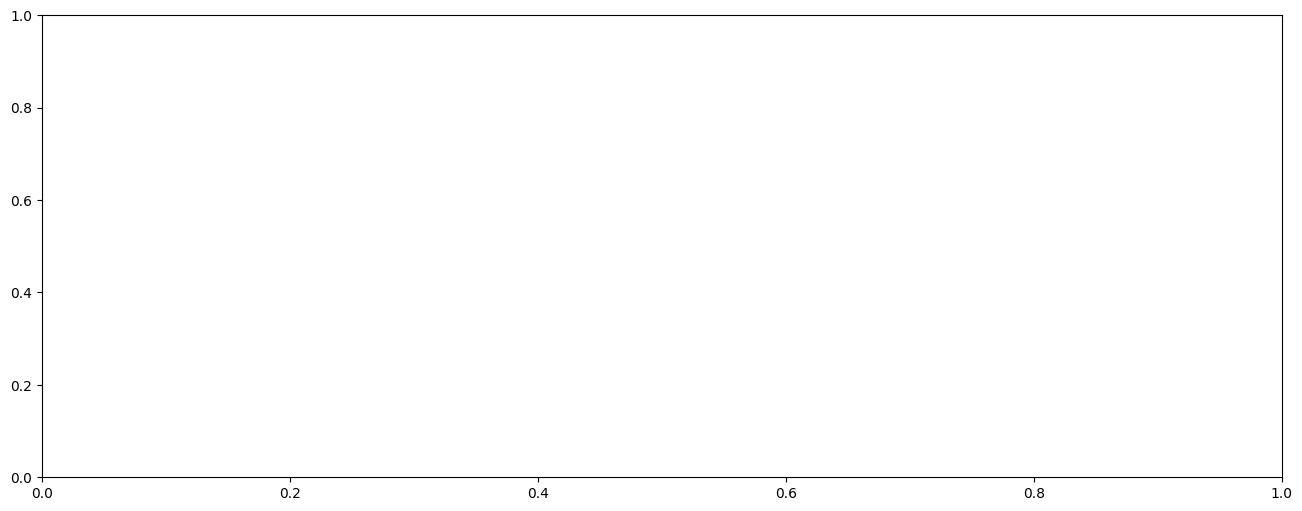

In [37]:
theta_3, theta_4 = 2, 0.2
# Actual theta_1, theta_2 = [-2, 0.5]
theta_asterisk = [[theta_hat.x[0],  theta_hat.x[1]],  [theta_3, theta_4]]

def model(X_t_1, theta_asterisk):
    if X_t_1 < 0:
        return theta_asterisk[0][0] + theta_asterisk[0][1] * X_t_1
    else: 
        return theta_asterisk[1][0] + theta_asterisk[1][1] * X_t_1
    

# In this part, it is desired to create a 3d contour plot of the N, and the lag??
# The following contour curves function will be used
# plt.contour([X, Y, ], Z)

def plot_contour(X_t_subset, p1_range, p2_range, loss_function, range_idx ,estimation_function = conditional_expectation):
    # In this, we want in an interval to plot the contours as a function of p1 and p2, for different lengths of the time series
    # We expect to see a lot of lines, decreases around the actual parameters, plot an 'x' around actual parameters
    
    # Determine the loss matrix
    local_loss_matrix = [[loss_function(X_t_subset, [p1, p2], estimation_function) for p1 in p1_range] for p2 in p2_range]
    plt.figure(figsize = (16, 6))
    P1_RANGE, P2_RANGE = np.meshgrid(p1_range, p2_range)
    # plt.contour([p1_range, p2_range], local_loss_matrix)
    plt.contour([P1_RANGE, P2_RANGE], local_loss_matrix)
    plt.scatter([-2], [0.5], marker = '+', color = 'red')
    plt.title(f'Loss contour curves for time series [{range_idx[0]}, {range_idx[1]}]')
    plt.show()

# Defining parameters
def main():
    p1_range, p2_range = np.linspace(-3, -1), np.linspace(- 3 / 2, 1 / 2)
    
    starts, stops = [1, 1, 1, 1001, 1001], [3000, 300, 30, 1300, 1030]
    for interval_index, _ in enumerate(starts):
        plot_contour(X_t[starts[interval_index] : stops[interval_index]], p1_range, p2_range, loss_function, [starts[interval_index], stops[interval_index]])

main()

